이 notebook의 원본 링크:  
+ [EDA To Prediction](https://www.kaggle.com/ash316/eda-to-prediction-dietanic)

# EDA To Prediction (DieTanic)

The Objective of this notebook is to give an **idea how is the workflow in any predictive modeling problem.** How do we check features, how do we add new features and some Machine Learning Concepts.

-> 이 notebook의 목적은 **예측 분석 모델링 작업이 어떻게 이루어지는지, 그 기초를 다지기 위함**에 있습니다. 어떻게 feature를 확인하고, 어떻게 새로운 feature를 추가하고, 어떻게 머신 러닝의 생각들을 접목시키는지 그 기본적인 것에 대하여 다룹니다.

## Part1: Exploratory Data Analysis(EDA)

먼저 필요한 라이브러리들을 import하고 주어진 데이터를 확인해봅시다.

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [99]:
# 훈련 데이터 불러오기
data = pd.read_csv('./input/train.csv')

In [100]:
# 훈련 데이터 한번 훑어보기
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [101]:
# 데이터 내에 있는 전체 null value 확인
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Age, Cabin, Embarked**에 있는 null value에 대한 처리 필요

### How many survived?

먼저 우리의 target label인 **Survived**를 확인해보자. 얼마나 생존하였는가?

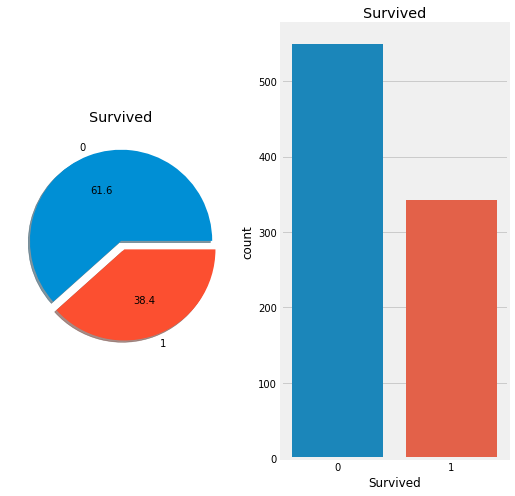

In [102]:
# survived에 대한 두 가지 그래프를 그릴 도화지 준비
f, ax = plt.subplots(1, 2, figsize=(8, 8))

# 하나는 파이 그래프로
data['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

# 하나는 막대 그래프로
sns.countplot('Survived', data=data, ax=ax[1])
ax[1].set_title('Survived')
plt.show()

많은 사람들이 생존하지 못한 것은 너무나 자명하다.

We need to dig down more to get better insights from the data and see which categories of the passengers did survive and who didn't

We will try to check the survival rate by using the different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age, etc.

-> 우리는 이 데이터에 대한 **insight**를 얻기 위하여 조금 더 깊게 분석을 해보아야 한다. 그리고 어떤 부류의 사람들이 생존하였고, 그렇지 못하였는지 확인을 해야 한다. 데이터에 있는 다른 여러 feature들과 생존률 사이의 관계를 확인하며 **insight**를 얻어보자.

First let us understand the different types of features.

먼저 feature들의 **type**를 파악하자

## Types Of Feature

### Categorical Features:

has two or more categories and each value in that feature can be categorised by them. also known as **Nominal Variables.**

둘 이상의 범주가 존재하고 그 범주에 따라 값들이 분류되어 있는 feature들. 명목변수(nominal Variable)이라고도 불림. 측정 대상의 특성을 분류하기 위한 변수로, 숫자는 오로지 **구분만을 위해 사용되며, 숫자 자체에 크기나 의미는 없다.**

**Categorical Features in the dataset: Sex, Embarked.**


### Ordinal Features:

similar to categorical values, but it has relative ordering or sorting btw the values.

명목 변수와 유사하지만, **측정 대상간에 서열을 부여하여 크고 작음, 높고 낮음, 순위를 파악하는 변수**이다. 즉, categorical feature과는 다르게 **부여되는 숫자에 의미가 존재**. 서열 변수라고 불림.

**Ordinal Features in the dataset: Pclass*


### Continuous Feature:

A feature is said to be continuous if it can take values btw any two points or btw the minimum or maximum in the features column.

어느 두 값 사이의 값들을 갖는다거나 해당 feature의 최대 최솟값 사이의 값을 가지면 그 feature를 continuous 하다고 말한다.

**Continuous Features in the dataset: Age**

## Analysing The Features

### Sex -> Categorical Feature

In [103]:
# 각 성별마다 생존한 사람과 그렇지 못한 사람 확인
data.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

In [104]:
data[['Sex', 'Survived']].groupby(['Sex'], as_index=False).count()

,Sex,Survived
0,female,314
1,male,577


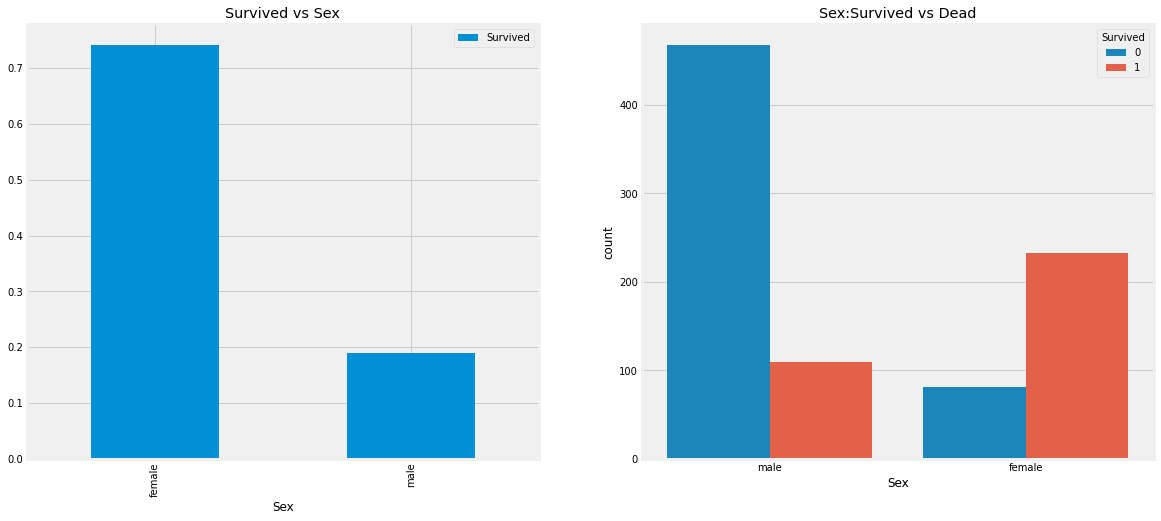

In [105]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

data[['Sex', 'Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', hue='Survived',data=data, ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
plt.show()

탑승한 승객은 남자가 더 많지만 **생존한 사람들은 여자가 더 많음.**
여자의 생존률은 70%가 넘어가는데 남자의 생존률은 20%를 넘지 못함.

This looks to be a **very important** feature for modeling. But is it the best?? Lets check other features.

매우 중요한 feature로 보이지만 일단 다른 feature들도 확인해보자.

## Pclass -> Ordinal Feature

In [106]:
pd.crosstab(data.Pclass, data.Survived, margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


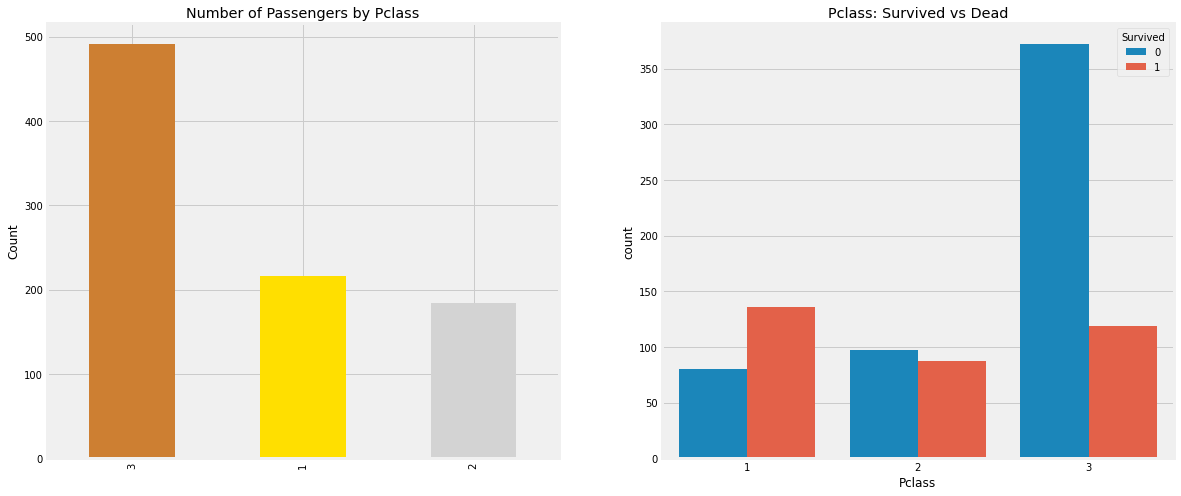

In [107]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 탑승 승객을 Pclass에 따라 분류
data['Pclass'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'], ax=ax[0])
ax[0].set_title('Number of Passengers by Pclass')
ax[0].set_ylabel('Count')

# 각 Pclass 내에서 생존한 사람들과 그렇지 못한 사람들의 수를 막대 그래프로 표현
sns.countplot('Pclass', hue='Survived', data=data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead')
plt.show()

People say **Money Can't Buy Everything.** But we can clearly see that Passengers Of Pclass 1 were given a very high priority while rescue.

사람들은 돈으로 모든 것을 살 수 없다고 얘기하지만 위의 그래프를 보면 **비싼 좌석에 앉았을수록 생존률이 높다.** Pclass=3 에 앉은 사람들이 가장 많지만, 생존률은 다른 Pclass에 비해 현격하게 낮다.

Lets DIve in little bit more and check for other interesting observations. Lets check survival rate with Sex and Pclass Together.

조금 더 들어가보죠. 이전에 분석한 Sex feature과 Pclass를 합쳐서 살펴보겠습니다. 

In [108]:
pd.crosstab([data.Sex, data.Survived], data.Pclass, margins=True).style.background_gradient(cmap='summer_r')

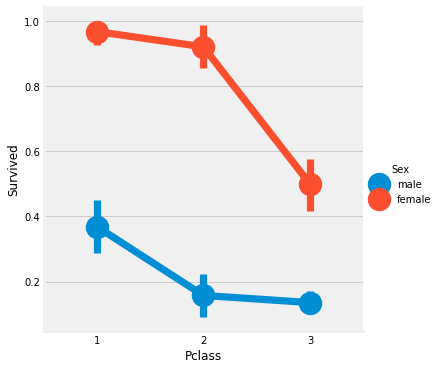

In [109]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=data)
plt.show()

We use **Factorplot** in this case, because they make the seperation of categorical values easy.

Looking at the CrossTab and Factorplot, we can easily infer that survival for **Women from Pclass1** is about 95~96%

It is evident that irrespective of Pclass, **Women were fiven first priority while rescue.**

Factorplot이 categorical value를 쉽게 분리하여 그래프로 나타내줌.

두 그래프를 보면 **Pclass1에 있던 여성들은 대부분이 생존하였다.** 그리고 모든 Pclass에서 여성의 생존률이 남성의 생존률보다 높다. 

**Pclass와 무관하게 구출 과정에서 여성은 1순위였었다는 것을 쉽게 유추할 수 있음.**

## Age -> Continuous Feature

In [110]:
print('Oldest Passenger was of:',data['Age'].max(),'Years')
print('Youngest Passenger was of:',data['Age'].min(),'Years')
print('Average Age on the ship:',data['Age'].mean(),'Years')

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


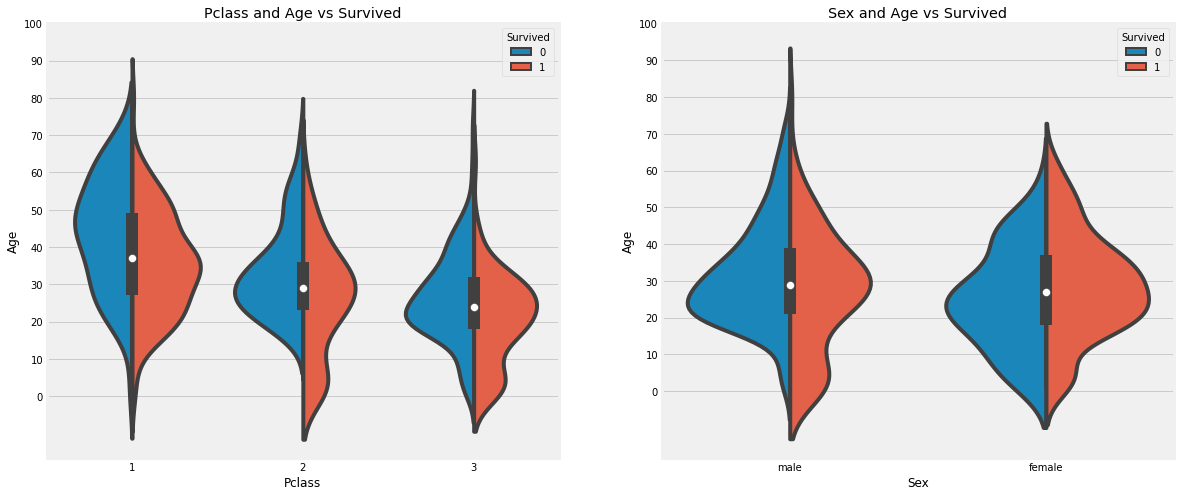

In [111]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))

sns.violinplot("Pclass", "Age", hue='Survived', data=data, split=True, ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0, 110, 10))

sns.violinplot("Sex", 'Age', hue='Survived', data=data, split=True, ax=ax[1])
ax[1].set_title("Sex and Age vs Survived")
ax[1].set_yticks(range(0, 110, 10))
plt.show()

Observations:

1) The number of children increases with Pclass and the survival rate for passengers below Age 10 looks to be good irrespective of the Pclass.

Pclass가 낮아질수록 아이들이 많음. 10세 이하 아이들의 생존률은 Pclass와 무관하게 높음.

2) Survival chances for Passengers aged 20-50 from Pclass1 is high and is even better for Women.

Pclass1에 탑승한 20-50세의 생존 가능성이 높으며 여성이 더 높음

3) For males, the survival chances decreases with an increase in age.

남성은 나이가 들수록 생존 가능성이 적어짐

앞에서 살펴봤듯이 Age feature에는 상당수의 **NULL값** 존재. 이를 채우는 가장 무난한 방법은 age feature의 평균값으로 채우는 것이다. 하지만 예를 들어 나이가 너무 어린 아이들의 나이를 평균값으로 채워버리면 이는 상식적으로 부정확한 방법이다. 그러면 **다른 feature들 중에서 나이를 예측할 수 있는 feature가 있을까?** 

=> 이름에 있는 Mr, Mrs 등으로 대강의 예측이 가능하다1

Thus we can assign the **mean values of Mr and Mrs to the respective groups!**

In [112]:
# 이름에서 호칭을 추출할 새로운 feature 생성
data['Initial'] = 0
for i in data:
    # 정규 표현식을 이용하여 호칭 추출
    data['Initial'] = data.Name.str.extract('([A-Za-z]+)\.')
    
pd.crosstab(data.Initial, data.Sex).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


잘못 작성된 호칭들도 있고, 많이 등장하지 않는 호칭들도 있다. 가장 대표적인 호칭들로 묶거나 애매한 호칭들은 아예 따로 묶어놓자. 그리고 **각 그룹의 나이의 평균값**으로 각 그룹에 존재하는 NULL값을 채우자.

In [113]:
# 호칭들 정리
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [114]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [115]:
# 각 그룹의 평균값으로 NULL 값 채우기
data.loc[(data.Age.isnull()) & (data.Initial=='Mr'), 'Age'] = 33
data.loc[(data.Age.isnull())&(data.Initial=='Mrs'),'Age']=36
data.loc[(data.Age.isnull())&(data.Initial=='Master'),'Age']=5
data.loc[(data.Age.isnull())&(data.Initial=='Miss'),'Age']=22
data.loc[(data.Age.isnull())&(data.Initial=='Other'),'Age']=46

In [116]:
# Age에 NULL값이 존재하는지 확인
data.Age.isnull().any()

False

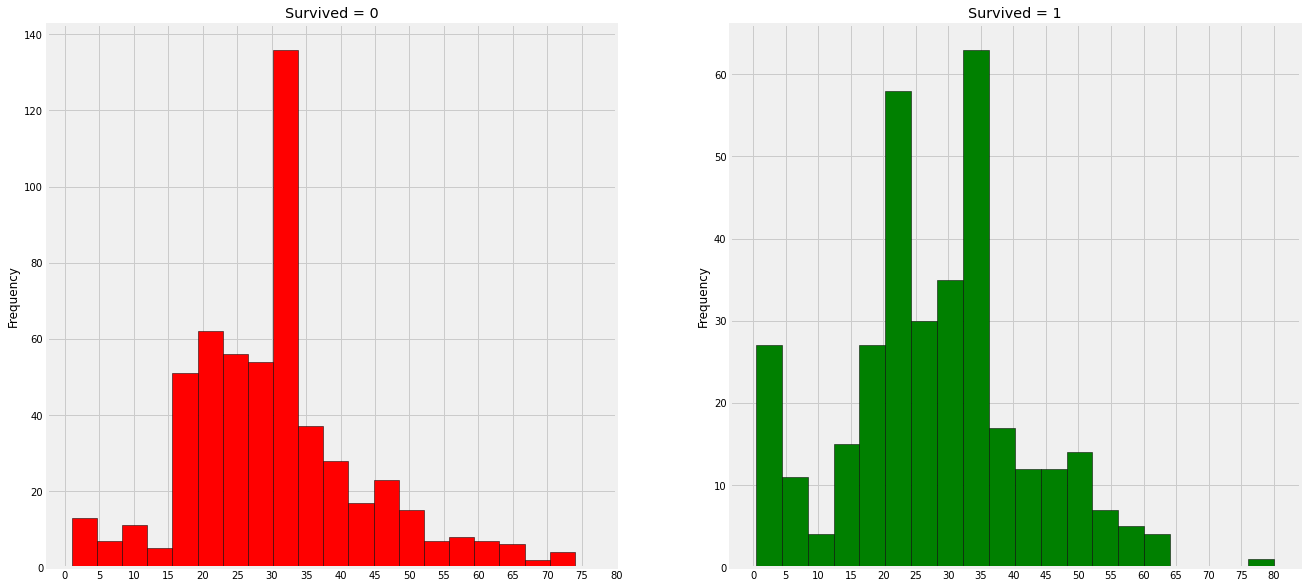

In [117]:
# 연령대별로 생존한 사람들의 수를 나타내는 막대 그래프를 그림
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# 생존하지 못한 사람들의 막대 그래프
data[data['Survived'] == 0].Age.plot.hist(ax=ax[0], bins=20, edgecolor='black', color='red')
ax[0].set_title('Survived = 0')
x1 = list(range(0, 85, 5))
ax[0].set_xticks(x1)

# 생존한 사람들의 막대 그래프
data[data['Survived'] == 1].Age.plot.hist(ax=ax[1], color='green', bins=20, edgecolor='black')
ax[1].set_title('Survived = 1')
ax[1].set_xticks(x1)
plt.show()  

Observatios:

1) The Toddlers(age<5) were saved in large numbers(The Women and Child First Policy).

아이들은 많이 생존 (여성과 아이들을 먼저 구출한다), 20대도 많이 생존

2) The oldest Passenger was saved.

가장 나이가 많으신 분도 생존

3) Maximum number of deaths were in the age group of 30-40.

30-40대가 많이 사망,

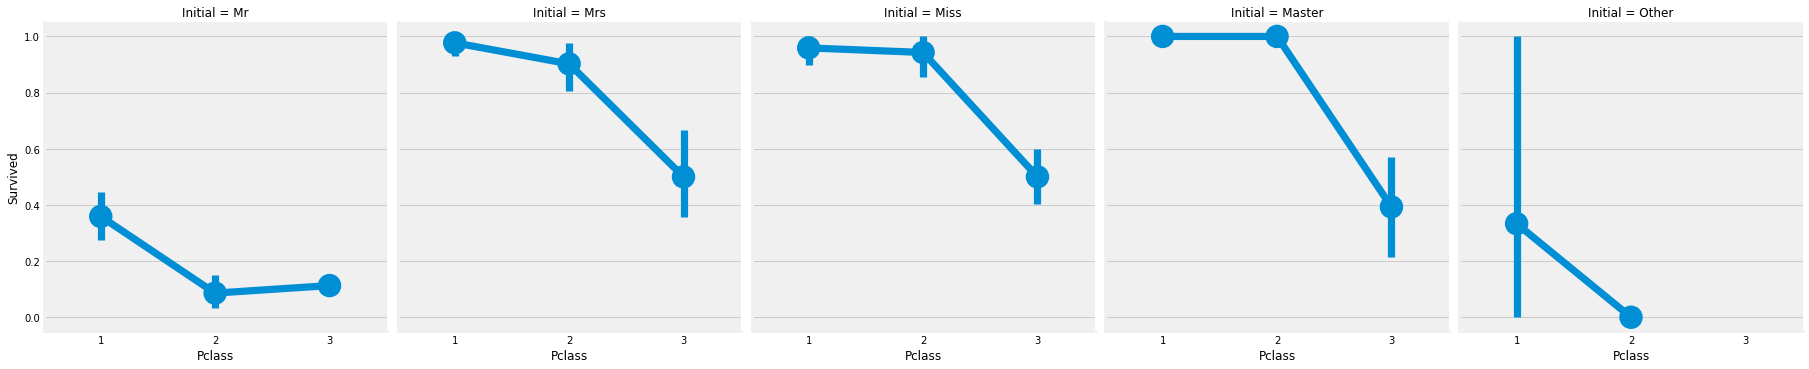

In [118]:
# 호칭과 Pclass에 따른 생존률을 그래프로 그림
sns.factorplot('Pclass', 'Survived', col='Initial', data=data)
plt.show()

# 확실히 여성이 많이 생존

## Embarked -> Categorical Value

In [119]:
# 출항한 항구와 Pclass에 따른 생존률을 남성과 여성으로 구분하여 표로 도식화
pd.crosstab([data.Embarked, data.Pclass], [data.Sex, data.Survived], margins=True).style.background_gradient(cmap='summer_r')

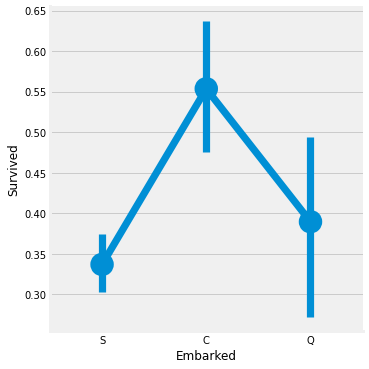

In [120]:
# 출항한 항구에 따른 생존률을 factorplot으로 표현
sns.factorplot('Embarked', 'Survived',data=data)
plt.show()

# C에서 탑승한 승객들의 생존률이 가장 높음

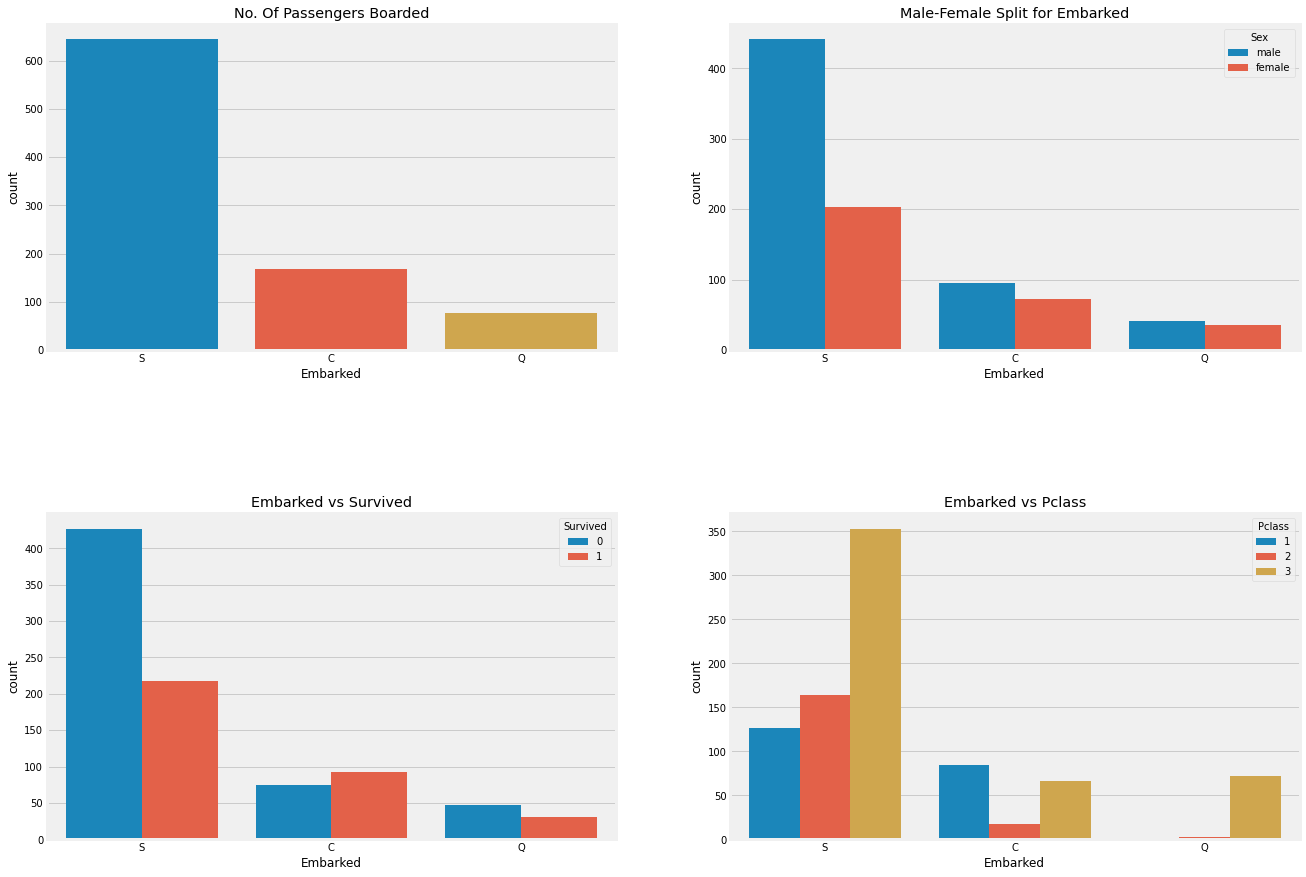

In [121]:
f, ax = plt.subplots(2, 2, figsize=(20, 15))

# 각 항구에서 탑승한 승객들의 수를 막대 그래프로 표현
sns.countplot('Embarked', data=data, ax=ax[0, 0])
ax[0, 0].set_title('No. Of Passengers Boarded')

# 각 항구에서 탑승한 승객들의 수를 성별을 나누어 막대 그래프로 표현
sns.countplot('Embarked',hue='Sex',data=data,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

# 각 항구에서 탑승한 승객들의 수를 생존 여부에 따라 나누어 막대 그래프로 표현
sns.countplot('Embarked',hue='Survived',data=data,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')

# 각 항구에서 탑승한 승객들의 수를 Pclass로 나누어 막대 그래프로 표현
sns.countplot('Embarked',hue='Pclass',data=data,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')

plt.subplots_adjust(wspace=0.2,hspace=0.5)
plt.show()

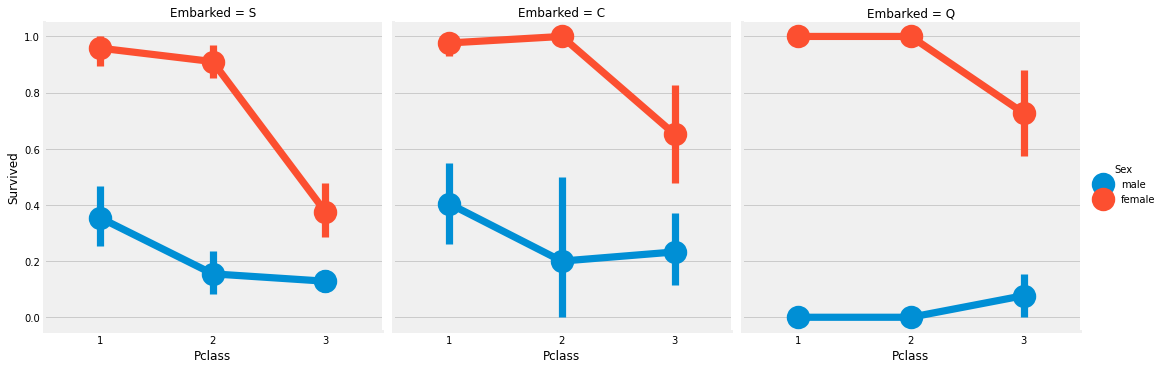

In [122]:
sns.factorplot('Pclass', 'Survived', hue='Sex', col='Embarked', data=data)
plt.show()

Observations:

1) S에서 가장 많이 탑승하였고, 대부분의 사람들은 Pclass3

2) C에서 탑승한 사람들 중 절반 이상의 사람들이 생존 -> 아마 Pclass1과 Pclass2의 사람들의 생존으로 인한 결과이지 않을까 싶음

3) S에서 Pclass1과 Pclass3 사람들이 가장 많이 탑승. 돈이 많으신 분들이 많이 탑승한 항구. 그럼에도 생존률은 그리 좋지 못함. -> Pclass3의 대부분의 사람들이 생존하지 못함

4) Q에서 탑승한 대부분의 사람들은 Pclass3

5) Pclass에 관계 없이 여성의 생존 가능성은 1에 가까움

6) S에서 탑승한 사람들중 Pclass3의 사람들은 대부분 생존하지 못함 **(Money matters)**

7) Q에서 탑승한 사람들중 남성은 거의 생존하지 못함. unluckiest

### Filling Embarked NaN

missing value가 2개 밖에 없으므로 가장 빈도 수가 높은 값인 S로 채움

In [123]:
data['Embarked'].fillna('S', inplace=True)

In [124]:
data.Embarked.isnull().any()

False

## SibSp -> Discrete Feature

This feature represents whether a person is alone or with his family members

In [125]:
pd.crosstab([data.SibSp], data.Survived).style.background_gradient(cmap='summer_r')

# 혼자 혹은 2명이서 탄 사람이 가장 많음

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


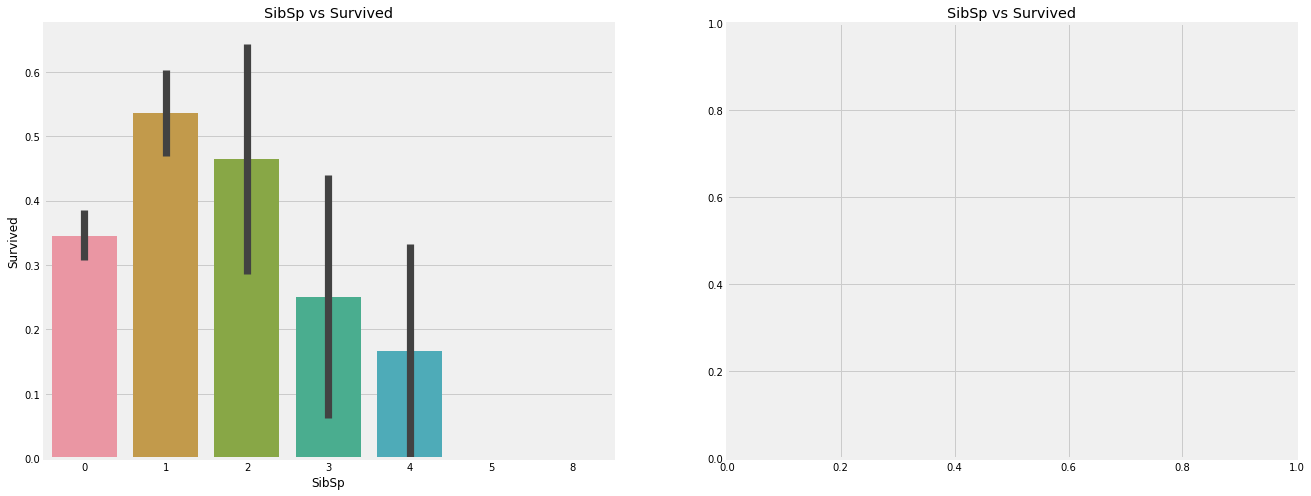

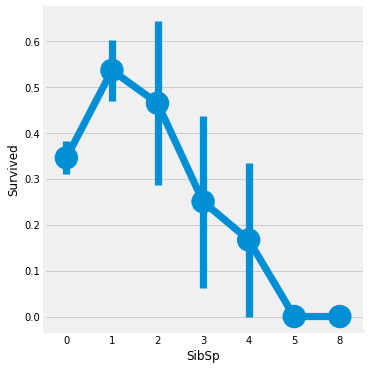

In [126]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.barplot('SibSp','Survived',data=data,ax=ax[0])
ax[0].set_title('SibSp vs Survived')

sns.factorplot('SibSp','Survived',data=data,ax=ax[1])
ax[1].set_title('SibSp vs Survived')

#plt.close(2)
plt.show()

In [127]:
pd.crosstab(data.SibSp, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


Observations:

형제자매 없이 탑승한 사람들의 생존률은 약 30% 정도이고, 형제자매의 수가 늘을 수록 생존률이 감소하는 형태를 보인다. 어찌보면 당연한 이야기이다. 자신의 가족들을 두고 혼자 탈출할 수는 없지 않은가. 

심지어 5~8명의 형제자매가 있는 경우에는 모두 사망하였다. 이는 **모두가 Pclass3에 탑승하였기 때문에** 사망한 것으로 보인다. 

It is imminent that all the large families in Pclass3(>3) died.

## Parch

In [128]:
pd.crosstab(data.Parch, data.Pclass).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


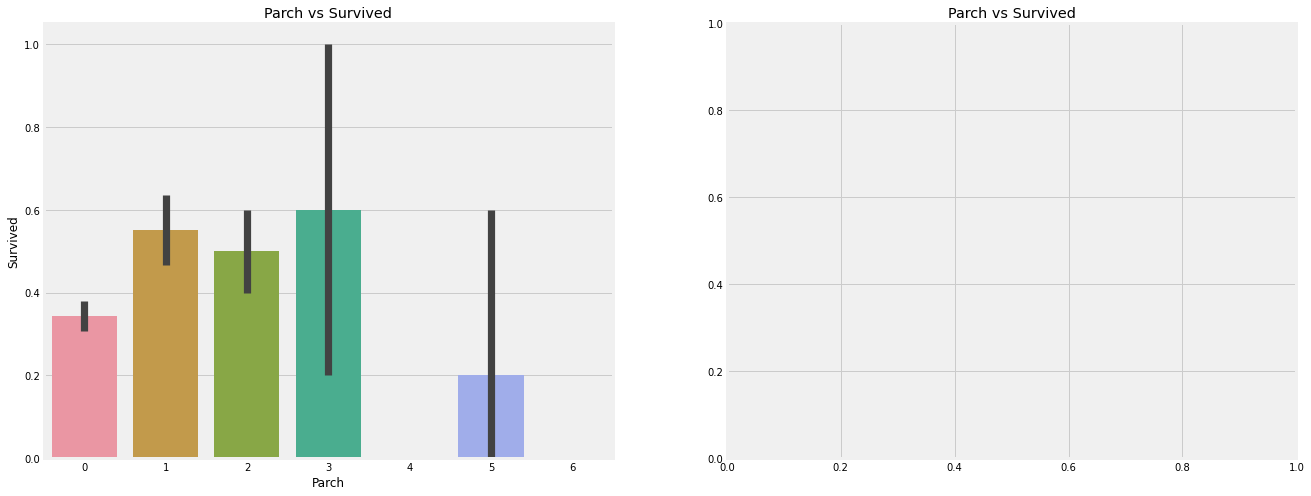

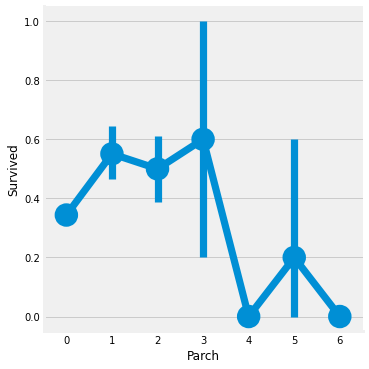

In [129]:
f, ax = plt.subplots(1, 2, figsize=(20, 8))

sns.barplot('Parch', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Parch vs Survived')

sns.factorplot('Parch', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Parch vs Survived')

#plt.close(2)
plt.show()

Observations:

Parch도 SibSp와 결과가 유사하다. 부모님과 자식의 수가 많아질수록 생존률이 크게 줄어들며, 1~3명 정도가 가장 생존할 확률이 높다. 신기한 것은 혼자 탑승하였어도 생존률이 그리 높지 않다.

## Fare -> Continuous Feature

In [130]:
print('Highest Fare was:',data['Fare'].max())
print('Lowest Fare was:',data['Fare'].min())   # 0.0
print('Average Fare was:',data['Fare'].mean())

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.204207968574636


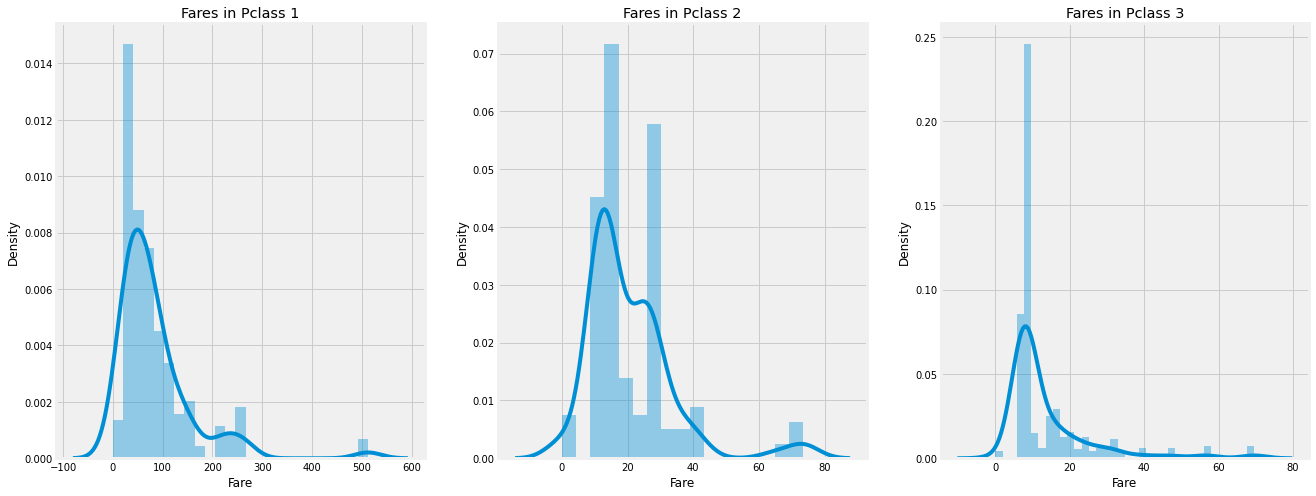

In [131]:
f, ax = plt.subplots(1, 3, figsize=(20, 8))

# Pclass==1의 운임 분포
sns.distplot(data[data['Pclass'] == 1].Fare, ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

# Pclass==2의 운임 분포
sns.distplot(data[data['Pclass'] == 2].Fare, ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

# Pclass==3의 운임 분포
sns.distplot(data[data['Pclass'] == 3].Fare, ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

## Observations in a Nutshell for all features:

**Sex:** **여성**의 생존 가능성이 남성보다 월등히 높음

**Pclass:** **1st class의 승객들**의 생존 가능성이 다른 두 class보다 높음. **3rd class**의 생존률은 매우 낮음. **Pclass1과 Pclass2에서 여성의 생존률은 거의 1에 가까움.**

**Embarked:** 대부분의 Pclass1의 승객들이 S에서 탔음에도 **C에서 탑승한 사람들의 생존률이 더 높음.** 아마 대부분의 Pclass3의 승객들도 S에서 탑승해서 그런 것 같음. C에서 탑승하는 것이 생존할 가능성이 더 높아보임. Q는 거의 다 Pclass3였음.

**SibSp + Parch:** 1\~2명의 형제자매, 또는 1\~3명의 부모 또는 자식과 같이 탑승한 승객의 생존 가능성이 높음

## Correlation Between The Features

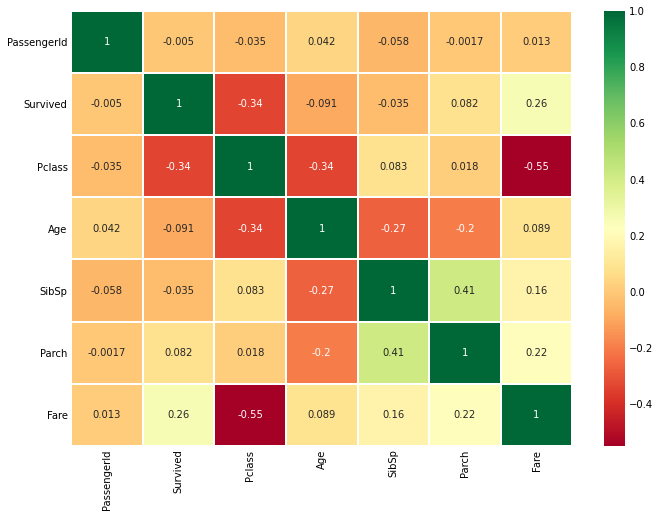

In [132]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
f = plt.gcf()
f.set_size_inches(10, 8)
plt.show()

### Interpreting The Heatmap

일단 numeric feature들 끼리의 상관관계를 수치화한 것이기 때문에 string feature들은 포함되어 있지 않음. 위 표를 분석하기 전에 상관관계가 무엇인지 짚고 넘어갑시다. 

양의 상관관계: A가 증가하면 B도 증가하는 관계, 값이 1이면 완벽하게 비례하는 관계
음의 상관관계: A가 증가하면 B는 감소하는 관계, 값이 1이면 완벽하게 반비례하는 관계

만약에 두 feature가 완벽한 상관관계를 가진다면 두 feature가 매우 유사한 정보를 가지고 있다고 생각해도 무방하다. 이것을 **다중공선성(MultiColinearity)** 라고도 이야기한다. 이는 통계를 하는데 있어 가장 경계해야하는 사항인데 간단하게 설명하면 두 변수의 상관관계가 커서 서로에게 영향을 끼쳐 모델의 성능을 오히려 저하시킨다는 것이다. 

두 변수의 상관관계가 크다는 것은 다르게 이야기하면 두 변수 중 하나만 있어도 상관없다는 이야기와 같다. 둘 중에 하나만 있어도 설명이 가능한데 굳이 둘 다 있을 필요는 없지 않은가. **(One of them is redundant)** 우리는 모델을 만들거나 훈련시킬대 최대한 많은 redundant한 feature들을 제거하여 모델의 성능을 끌어올려야 한다. 

위 heatmap에서는 상관관계가 강한 변수들이 없으므로 모든 변수들을 가지고 간다.

## Part2: Feature Engineering and Data Cleaning

우리에게 주어지는 데이터들 안에는 우리들에게 필요없는 정보들도 존재한다. 제거해야 할 redundant한 feature들도 존재하고, 또는 새로운 feature를 만들어 새로운 insight를 얻을 수 있는 feature들도 존재한다.

위에서 Name feature에서 Initial을 뽑아낸 것도 feature engineering의 일환이다. 

### Age_band

현재 Age는 **continuous feature**이기 때문에 학습에 있어 문제가 있다. 쉽게 예를 들어보자면 우리가 연령대별로 어떤 것에 대한 통계를 낼 때, 나이대별로 통계를 내지, 나이 하나하나를 가지고 통계를 내지 않는다. 나이대별로 묶는 것이 더 편하기도 하고, 더 대표성을 가지고 있고, value 하나하나를 변수로 두면 데이터에 대한 insight를 얻지 못할 가능성이 크기 때문이다. Age feature도 마찬가지이다. 우리는 이 feature를 **categorical하게 바꿔줄 필요가 있다.**

In [133]:
# age -> categorical 하게 변경
data['Age_band'] = 0
data.loc[data['Age']<=16, 'Age_band'] = 0
data.loc[(data['Age']>16)&(data['Age']<=32), 'Age_band'] = 1
data.loc[(data['Age']>32)&(data['Age']<=48), 'Age_band'] = 2
data.loc[(data['Age']>48)&(data['Age']<=64), 'Age_band'] = 3
data.loc[data['Age']>64, 'Age_band'] = 4
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,2


In [134]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


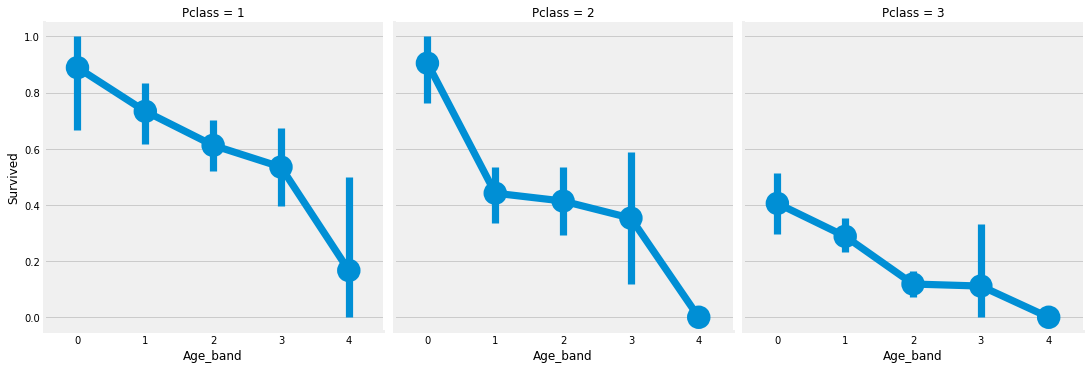

In [135]:
sns.factorplot('Age_band', 'Survived', data=data, col='Pclass')
plt.show()

# Pclass와 무관하게 age가 많을수록 생존률이 떨어진다.

### Family_Size and Alone

Parch와 SibSp를 합쳐 Family_Size라는 새로운 feature 생성 -> 가족단위에 따른 승객의 생존률 확인 가능

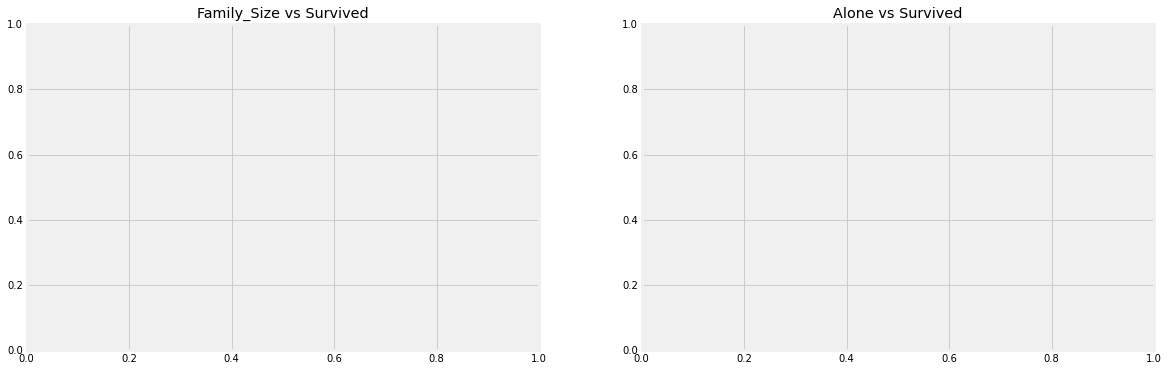

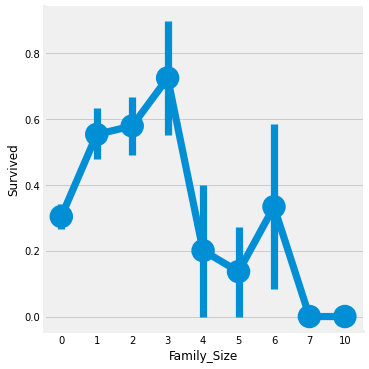

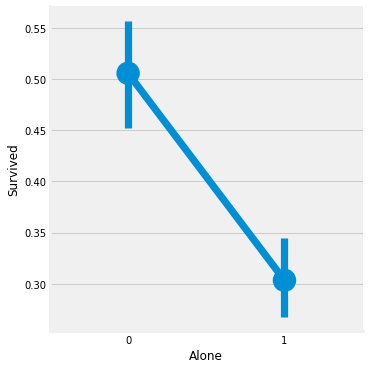

In [136]:
# FamilySize 생성
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']

# Alone 생성. 해당 승객이 혼자 탑승했는지 그렇지 않은지
data['Alone'] = 0
data.loc[data.Family_Size == 0, 'Alone'] = 1

f, ax = plt.subplots(1, 2, figsize=(18, 6))

sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs Survived')

sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs Survived')

plt.show()

**Family_Size가 0이라는 것은 해당 승객이 혼자 탑승했다는 것.** 혼자 탑승했을 경우 생존률이 낮으며, 가족단위가 4가 넘어가도 생존률이 낮아짐. 생존 여부에 중요한 feature로 보임.

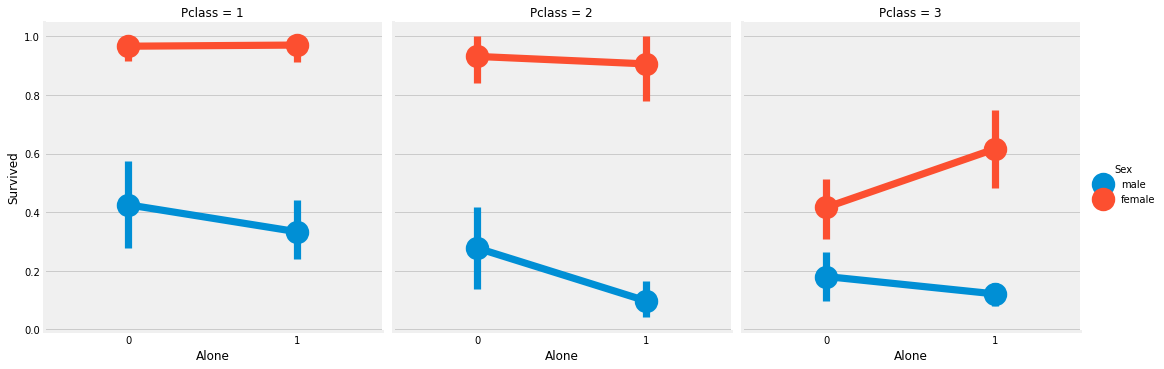

In [137]:
sns.factorplot('Alone', 'Survived', data=data, hue='Sex', col='Pclass')
plt.show()

# Pclass와 Sex와 무관하게 혼자 탑승한 승객의 생존률은 그리 높지 못하다.

### Fare_Range

fare도 continuous한 feature이기 때문에 ordinal value로 바꿔줘야한다. 여기서는 **pandas의 qcut**을 사용한다. qcut(n)은 주어진 데이터를 n개의 동등한 구간으로 이산화시켜준다.

In [138]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

# Fare가 커질수록 생존의 가능성도 커진다.

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


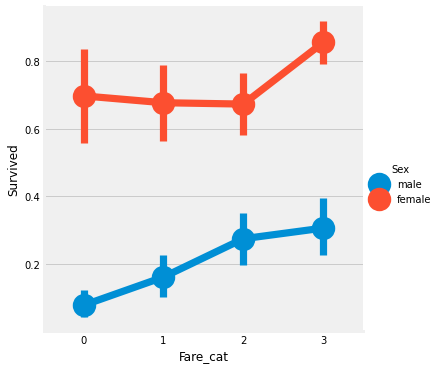

In [139]:
# Age와 똑같이 ordinal하게 바꿔준다.
data['Fare_cat']=0
data.loc[data['Fare']<=7.91,'Fare_cat']=0
data.loc[(data['Fare']>7.91)&(data['Fare']<=14.454),'Fare_cat']=1
data.loc[(data['Fare']>14.454)&(data['Fare']<=31),'Fare_cat']=2
data.loc[(data['Fare']>31)&(data['Fare']<=513),'Fare_cat']=3

sns.factorplot('Fare_cat', 'Survived', data=data, hue='Sex')
plt.show()

# Fare가 증가할 수록 생존률도 증가 -> Sex와 더불어 중요한 feature

### Converting String Values into Numeric

컴퓨터는 string 보다 numeric value를 더 잘 처리하기에 변환해줍시다.

In [140]:
# string value들 모두 numerical하게 바꿔줌 (nominal)
data['Sex'].replace({'male':0, 'female':1}, inplace=True)
data['Embarked'].replace({'S': 0, 'C': 1, 'Q': 2}, inplace=True)
data['Initial'].replace({'Mr': 0, 'Mrs':1, 'Miss':2, 'Master':3, 'Other':4}, inplace=True)

In [141]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band,Family_Size,Alone,Fare_Range,Fare_cat
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,1,0,"(-0.001, 7.91]",0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1,1,2,1,0,"(31.0, 512.329]",3
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,2,1,0,1,"(7.91, 14.454]",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0,1,2,1,0,"(31.0, 512.329]",3
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0,0,2,0,1,"(7.91, 14.454]",1


### Dropping UnNeeded Features

필요없는 feature들은 데이터 내에서 제거를 해줍시다.

+ Name: Initial 뽑았으니까 필요 없음
+ Age: Age_band 만들었으니까 필요 없음
+ Ticket: 다양한 string값 존재. 
+ Fare: Fare_cat 만들었으니까 필요 없음
+ Cabin: NaN 값들이 많고 한 사람이 여러 개의 cabin을 가지고 있기도 함.
+ Fare_Range: Fare_cat 만들었으니까 필요 없음
+ PassengerId: 의미 없는 index 값

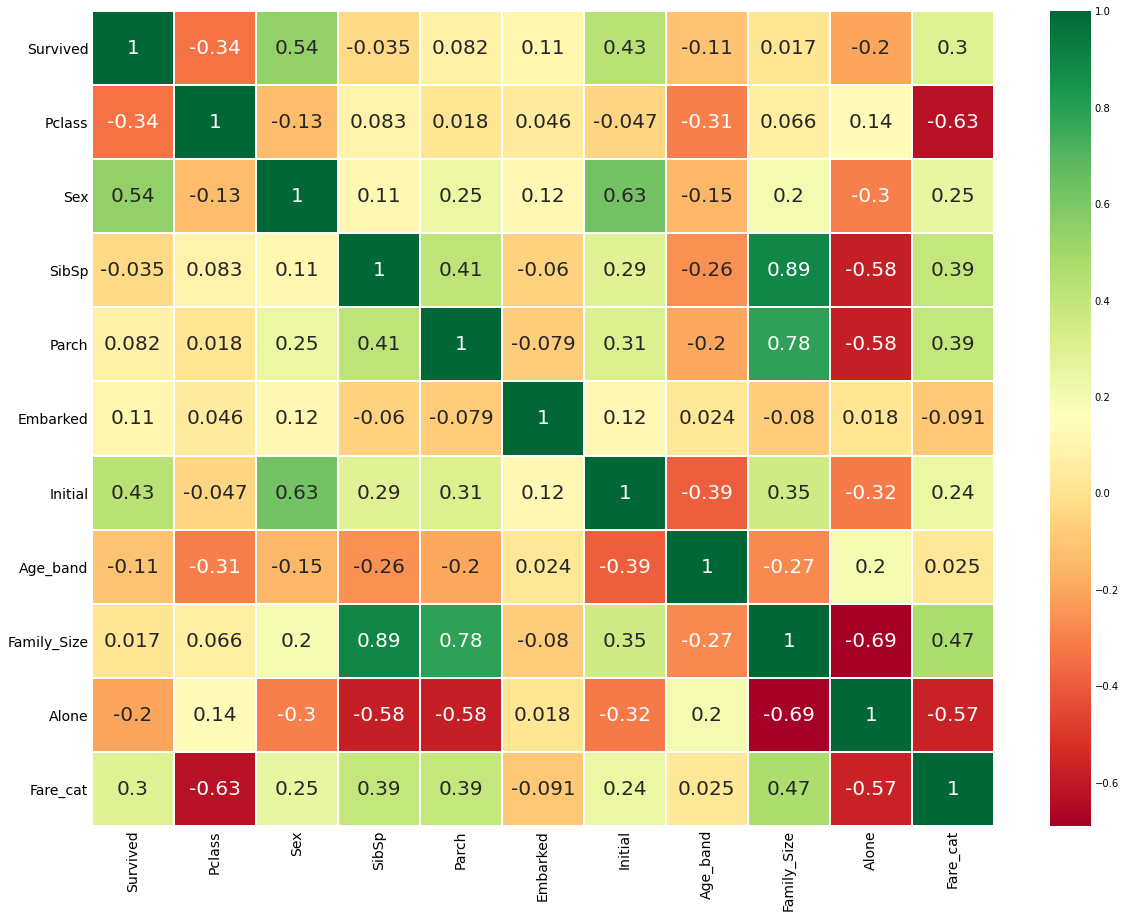

In [142]:
# 위에서 언급한 feature들 제거
data.drop(['Name', 'Age', 'Ticket', 'Fare', 'Cabin', 'Fare_Range', 'PassengerId'], axis=1, inplace=True)

# 모든 feature들의 상관관계 확인
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2, annot_kws={'size':20})

f = plt.gcf()
f.set_size_inches(18, 15)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

# FamilySize와 SibSp, Parch는 상당한 양의 상관관계를 가짐. (그도 그럴 것이 FamilySize가 이 둘을 가지고 만든 변수)
# 빼도 되지 않을까 싶음

## Part3: Predictive Modeling

EDA 과정을 거치면서 주어진 데이터에 대한 insight를 얻기는 하였지만 이것만 가지고는 어떤 승객이 생존할지 말지를 정확하게 예측할 수 없다. 지금부터는 여러 classification algorithm 들을 가지고 승객들의 생존 여부를 예측하는 모델을 만들어보자.  

1) Logistic Regression

2) Support Vector Machines(Linear and radial)

3) Random Forest

4) K-Nearest Neighbors

5) Naive Bayes

6) Decision Tree

In [143]:
# 필요한 ML 라이브러리들 import
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [144]:
# 훈련 데이터와 테스트 데이터 분리
# stratify: target label의 분포 비율을 유지하며 데이터셋을 분리
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])

train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]

test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]

X = data[data.columns[1:]]
Y = data['Survived']

### Support Vector Machines (SVM)

참고 링크: 
+ [초짜 대학원생의 입장에서 이해하는 Support Vector Machine (1)](http://jaejunyoo.blogspot.com/2018/01/support-vector-machine-1.html)

SVM에서 풀고자 하는 문제는 다음과 같습니다.  

> **"How do we divide the space with decision boundaries?"**

우리가 지금 풀고자 하는 문제에 접목을 하면 위의 질문은 이렇게 변할 것입니다. 

> 생존하는 사람들과 그렇지 않은 사람들의 경계를 어떻게 나누어야 하는가?

SVM의 원리나 복잡한 수식들은 일단 제껴놓고 일단 모델을 만들어보겠습니다.

In [145]:
# Radial SVM
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is ',metrics.accuracy_score(prediction1,test_Y))

Accuracy for rbf SVM is  0.835820895522388


In [146]:
# Linear SVM
model = svm.SVC(kernel='linear', C=0.1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for linear SVM is',metrics.accuracy_score(prediction2,test_Y))

Accuracy for linear SVM is 0.8171641791044776


### Logistic Regression(로지스틱 회귀)

Binary Classification 문제를 푸는 대표적인 알고리즘

In [147]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction3,test_Y))

The accuracy of the Logistic Regression is 0.8134328358208955


### Decision Tree (의사 결정 트리)

참고 링크:
+ [의사결정나무(Decision Tree)](https://ratsgo.github.io/machine%20learning/2017/03/26/tree/)

의사결정나무는 데이터를 분석하여 이들 사이에 존재하는 패턴을 예측 가능한 규칙들의 조합으로 나타내며, 그 모양이 '나무'와 같다고 해서 **의사결정나무**라고 불림. 질문을 던져서 대상을 좁혀나가는 '스무고개' 놀이와 비슷한 개념. 분류와 회귀에 모두 사용 가능

In [148]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction4,test_Y))

The accuracy of the Decision Tree is 0.8097014925373134


### K-Nearest Neighbors (K-NN 알고리즘)

참고 링크:
+ [K-NN 알고리즘 개념](https://blog.naver.com/bestinall/221760380344)

모든 기업들에게 'VIP' 고객은 중요하다. 그런데 'VIP' 고객들은 그 기업 내에서 어떻게 성장을 하였을까? 어떤 모습으로 어떻게 해당 기업의 서비스를 사용하였을까? **과연 그들은 초기 사용때부터 떡잎부터 달랐을까?** 그러면 이 '떡잎'을 빨리 찾아서 더 많은 '될성부른 나무'를 키울 수 있지 않을까?

K-NN 알고리즘은 새로운 데이터를 입력 받았을 때 **가장 가까이 있는 것이 무엇이냐**를 중심으로 새로운 데이터의 종류를 정해주는 알고리즘이다. 속담 중 유유상종이 가장 잘 어울리는 알고리즘입니다. 이때 가장 가까이에 있는 것만을 참고하면 부적절한 결과가 나올 수 있기에 주변의 **K개의 데이터**를 참고하여 분류하는 것이 **K-NN 알고리즘** 입니다.

In [149]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction5,test_Y))

The accuracy of the KNN is 0.832089552238806


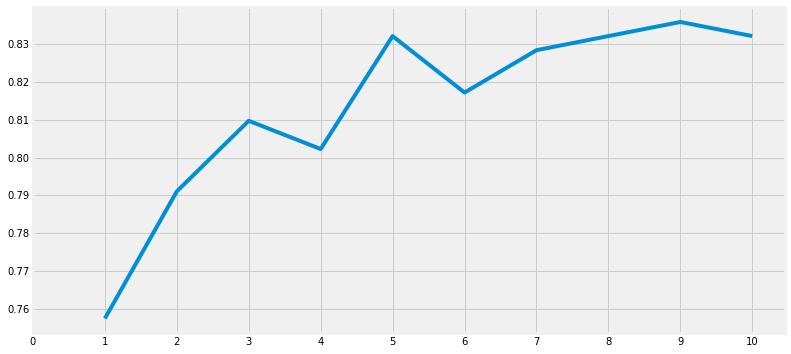

Accuracies for different values of n are: [0.75746269 0.79104478 0.80970149 0.80223881 0.83208955 0.81716418
 0.82835821 0.83208955 0.8358209  0.83208955] with the max value as  0.835820895522388


In [150]:
# K값 바꿔가면서 모델의 성능 측정
a_index = list(range(1, 11))
a = pd.Series() # 후의 그래프 표현을 쉽게 하기 위한 Series 선언
x = [0,1,2,3,4,5,6,7,8,9,10]

for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
    
plt.plot(a_index, a)
plt.xticks(x)
f = plt.gcf()
f.set_size_inches(12, 6)
plt.show()

print('Accuracies for different values of n are:',a.values,'with the max value as ',a.values.max())

# k=9일때 가장 성능이 좋음

### Gaussian Naive Bayes

참고 링크:
+ [중학생도 쉽게 이해하는 Gaussian Naive Bayes Classifier](https://devkor.tistory.com/entry/Gaussian-Naive-Bayes)

Naive Bayes는 확률을 이용해서 가장 합리적인 예측값을 계산하는 방식

In [151]:
model = GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('The accuracy of the NaiveBayes is',metrics.accuracy_score(prediction6,test_Y))

The accuracy of the NaiveBayes is 0.8134328358208955


### Random Forest

Decision Tree의 오버피팅 한계를 극복하기 위한 방법.
훈련을 통해 구성해놓은 **다수의 나무들로부터 분류 결과를 취합해서 결론을 얻는**, 인기 투표와 유사한 원리. 다수의 학습 알고리즘을 사용하는 **앙상블(ensemble)** 학습법

In [152]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)
print('The accuracy of the Random Forests is',metrics.accuracy_score(prediction7,test_Y))

The accuracy of the Random Forests is 0.8171641791044776
